Scanpy data loading tutorial from
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [16]:
import numpy as np
import pandas as pd
import scanpy as sc

1. Load the data into an AnnData Object

In [17]:
# Set read/write directories
input_folder = 'data/filtered_gene_bc_matrices/hg19/'
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [18]:
# Create AnnData object from cahced file
adata=sc.read_h5ad(results_file)
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [19]:
# Compute neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [46]:
# Run UMAP
sc.tl.leiden(adata) # Generate clusters for paga graph
sc.tl.paga(adata) # Creates a course-grained manifold strucutre prior to UMAP
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

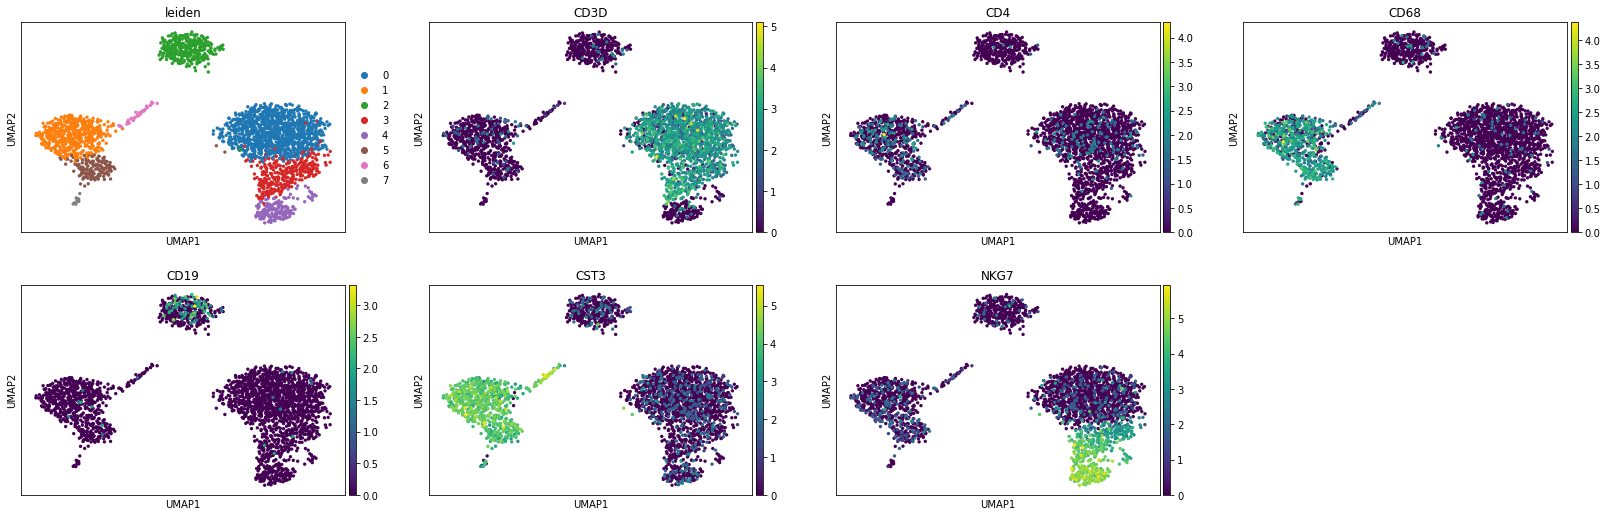

In [51]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden','CD3D','CD4','CD68','CD19','CST3', 'NKG7']) # Markers for T cells, CD4+, Macrophage, B cells, Monocytes(?), NK cells

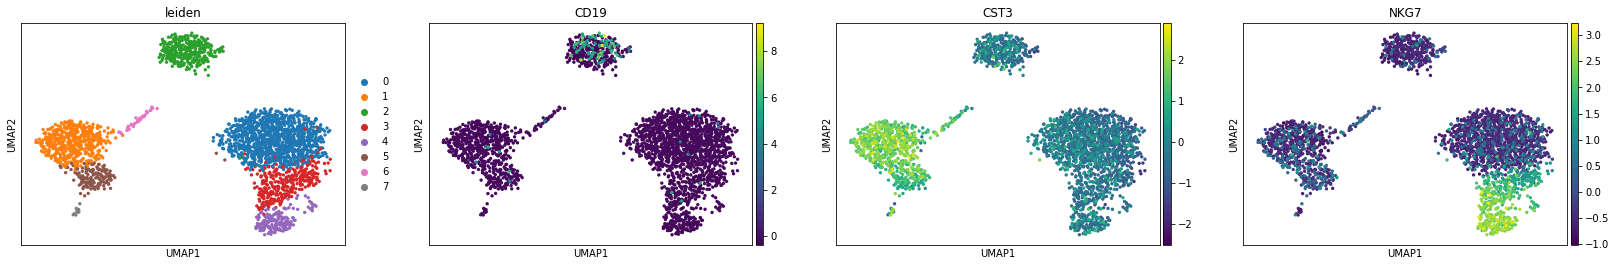

In [53]:
# Run on unocrrected samples
sc.pl.umap(adata, use_raw=False, color=['leiden','CD19','CST3', 'NKG7']) # Markers for T cells, CD4+, Macrophage, B cells, Monocytes(?), NK cells

In [54]:
adata.write(results_file)

In [55]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'